In [1]:
import numpy as np
import chess
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque
import random
from typing import List, Tuple, Optional
import time

from alpha_model import Node, AlphaZero, ChessNet, ReplayBuffer, CurriculumManager, board_to_tensor

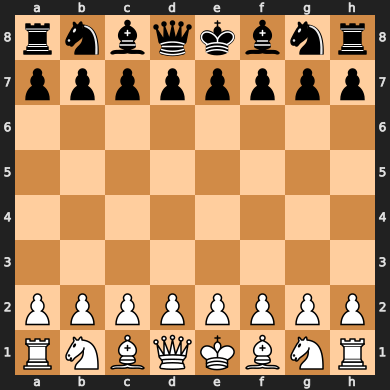

In [2]:
board = chess.Board()
board

In [3]:
# Get board state
str(board)

'r n b q k b n r\np p p p p p p p\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\nP P P P P P P P\nR N B Q K B N R'

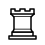

In [4]:
board.piece_at(0)

In [5]:
board.piece_at(0).symbol()

'R'

In [6]:
board_to_tensor(board)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 1.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1., 

In [7]:
board_to_tensor(board).shape

torch.Size([19, 8, 8])

In [8]:
board_to_tensor(board)[0] # Black pawns

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
board_to_tensor(board)[1] # Black knights

tensor([[0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
piece_idx = {"P": 0, "N": 1, "B": 2, "R": 3, "Q": 4, "K": 5,
             "p": 6, "n": 7, "b": 8, "r": 9, "q": 10, "k": 11}

piece_idx[board.piece_at(0).symbol()]

3

In [11]:
float(board.turn)

1.0

In [ ]:
# Initialize model and agent
model = ChessNet()
agent = AlphaZero(model)

# Training phase
print("Starting training...")
agent.train(num_iterations=1000)  # Adjust number of iterations as needed

# Save the trained model
torch.save(model.state_dict(), 'alphazero_chess_model.pth')

Starting training...
Iteration 0
Curriculum Phase: 0
Max Moves: 30
Moves Made: 30
Policy Loss: 0.0000
Value Loss: 0.0000
Buffer size: 30
Sample predictions:
Values - Predicted vs Actual:
  First Position 1: 1.0000 vs -0.1030
  First Position 2: 1.0000 vs -0.1030
  First Position 3: 1.0000 vs 0.1030
  First Position 4: 1.0000 vs -0.1030
  First Position 5: 1.0000 vs -0.1030
  Last Position 1: 1.0000 vs -0.1030
  Last Position 2: 1.0000 vs 0.1030
  Last Position 3: 1.0000 vs 0.1030
  Last Position 4: 1.0000 vs -0.1030
  Last Position 5: 1.0000 vs -0.1030

Top 3 Policy Predictions vs Targets:

Position 1:
  Predicted moves (index, probability):
    Index 1497: 0.7956
    Index 711: 0.1638
    Index 746: 0.0240
  Target moves (index, probability):
    Index 10: 1.0000
    Index 1: 0.0000
    Index 0: 0.0000

Position 2:
  Predicted moves (index, probability):
    Index 711: 0.7915
    Index 1497: 0.1664
    Index 1845: 0.0150
  Target moves (index, probability):
    Index 10: 0.9899
    In

In [ ]:
torch.save(model.state_dict(), 'alphazero_chess_model.pth')

In [ ]:
# Play a test game
print("\nPlaying test game...")
board = chess.Board()
while not board.is_game_over():
    actions, policy, probs = agent.get_action_probs(board, temperature=0.5)
    if actions is None:
        break
    move = actions[np.argmax(probs)]
    board.push(move)
    print(board)
    print("\n")
    #time.sleep(.5)  # Pause to make the game viewable

print("Game result:", board.result())

In [ ]:
def play_against_human(agent):
    board = chess.Board()
    
    # Create an interactive game loop
    while not board.is_game_over():
        print("\nCurrent board position:")
        print(board)
        print("\nFEN:", board.fen())
        
        if board.turn == chess.WHITE:  # Human plays White
            # Get human move
            valid_move = False
            while not valid_move:
                try:
                    move_str = input("\nEnter your move (e.g., 'e2e4'): ")
                    move = chess.Move.from_uci(move_str)
                    if move in board.legal_moves:
                        valid_move = True
                    else:
                        print("Illegal move! Try again.")
                except ValueError:
                    print("Invalid input format! Use format 'e2e4'")
        
        else:  # AI plays Black
            print("\nAI is thinking...")
            actions, policy, probs = agent.get_action_probs(board, temperature=0.5)
            if actions is None:
                break
                
            # Select best move
            move = actions[np.argmax(probs)]
            
            # Get value prediction for this position
            state_tensor = board_to_tensor(board).unsqueeze(0).to(agent.device)
            with torch.no_grad():
                _, value = agent.model(state_tensor)
            print(f"AI evaluation: {value.item():.3f}")  # -1 (losing) to 1 (winning)
        
        # Make the move
        board.push(move)
        print(f"\nMove played: {move}")
        
        # Show captures and material count
        material_count = {
            'P': str(len(board.pieces(chess.PAWN, chess.WHITE))),
            'N': str(len(board.pieces(chess.KNIGHT, chess.WHITE))),
            'B': str(len(board.pieces(chess.BISHOP, chess.WHITE))),
            'R': str(len(board.pieces(chess.ROOK, chess.WHITE))),
            'Q': str(len(board.pieces(chess.QUEEN, chess.WHITE))),
            'p': str(len(board.pieces(chess.PAWN, chess.BLACK))),
            'n': str(len(board.pieces(chess.KNIGHT, chess.BLACK))),
            'b': str(len(board.pieces(chess.BISHOP, chess.BLACK))),
            'r': str(len(board.pieces(chess.ROOK, chess.BLACK))),
            'q': str(len(board.pieces(chess.QUEEN, chess.BLACK)))
        }
        print("\nMaterial count:")
        print(f"White: P:{material_count['P']} N:{material_count['N']} B:{material_count['B']} R:{material_count['R']} Q:{material_count['Q']}")
        print(f"Black: p:{material_count['p']} n:{material_count['n']} b:{material_count['b']} r:{material_count['r']} q:{material_count['q']}")
    
    # Game over
    print("\nGame Over!")
    print("Final position:")
    print(board)
    print("\nResult:", board.result())
    if board.is_checkmate():
        winner = "White" if not board.turn else "Black"
        print(f"{winner} wins by checkmate!")
    elif board.is_stalemate():
        print("Draw by stalemate!")
    elif board.is_insufficient_material():
        print("Draw by insufficient material!")
    elif board.is_fifty_moves():
        print("Draw by fifty-move rule!")
    elif board.is_repetition():
        print("Draw by repetition!")

def display_top_moves(agent, board, n=5):
    """Display top n moves the AI is considering"""
    actions, probs = agent.get_action_probs(board, temperature=0.1)
    if actions is None:
        return
    
    # Get indices of top n moves
    top_indices = np.argsort(probs)[-n:][::-1]
    
    print("\nTop moves AI is considering:")
    for i, idx in enumerate(top_indices, 1):
        move = actions[idx]
        probability = probs[idx] * 100
        print(f"{i}. {move} ({probability:.1f}%)")

In [ ]:
# Start game
print("Welcome to Chess vs AlphaZero!")
print("You'll play as White, enter moves in UCI format (e.g., 'e2e4')")
print("Type 'quit' to end the game\n")

play_against_human(agent)